<a href="https://colab.research.google.com/github/AriAlfiandi/judul/blob/main/CNN_Jamur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Praktikum Materi 2

# Bagian Baru

1. CONNECT TO DRIVE

In [ ]:
from google.colab import drive
drive.mount ('/content/drives/')


Mounted at /content/drives/


2. IMPORT LIBRARY

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from tensorflow.keras import datasets, layers, models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as implt
from PIL import Image

3. BUAT DIREKTORI UNTUK DATA TRAIN DAN DATA TEST

In [ ]:
train_edible_dir = ("/content/drives/MyDrive/Jamur/klasifikasi jamur/train/training_edible")
train_poisonus_dir = ("/content/drives/MyDrive/Jamur/klasifikasi jamur/train/training_poisonous")
test_edible_dir = ("/content/drives/MyDrive/Jamur/klasifikasi jamur/test/testing_edible")
test_poisonus_dir = ("/content/drives/MyDrive/Jamur/klasifikasi jamur/test/testing_poisonous")

4. DATA PRERPOCESSING

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True
                                   )
training_set = train_datagen.flow_from_directory('/content/drives/MyDrive/Jamur/klasifikasi jamur/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 1091 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drives/MyDrive/Jamur/klasifikasi jamur/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 484 images belonging to 2 classes.


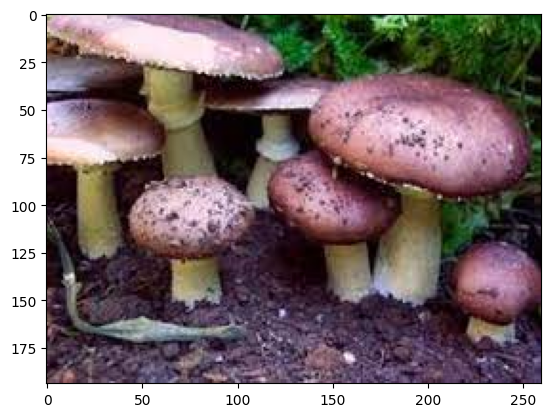

In [ ]:
img = implt.imread(train_edible_dir + "/ce (218).jpg")
plt.imshow(img)

5. MODEL ARSITEKTUR CNN

In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
model.add(layers.MaxPool2D(pool_size=2, strides=2))

model.add(layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(layers.MaxPool2D(pool_size=2, strides=2))

model.add(layers.Flatten())

model.add(layers.Dense(units=128, activation='relu'))
model.add(layers.Dense(units=1, activation='sigmoid'))

6. MENAMPILKAN ARSITEKTUR LENGKAP MODEL

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

7. COMPILE AND TRAIN THE MODEL

In [ ]:
model.compile(optimizer = 'adam',
              loss= 'binary_crossentropy',
              metrics = ['accuracy'])

classifier = model.fit(x= training_set, validation_data = test_set, epochs = 50)

Epoch 1/50
35/35 [==============================] - 22s 613ms/step - loss: 0.3814 - accuracy: 0.8203 - val_loss: 0.7908 - val_accuracy: 0.6488
Epoch 2/50
35/35 [==============================] - 18s 523ms/step - loss: 0.3545 - accuracy: 0.8368 - val_loss: 0.7703 - val_accuracy: 0.6880
Epoch 3/50
35/35 [==============================] - 19s 534ms/step - loss: 0.3420 - accuracy: 0.8515 - val_loss: 0.8201 - val_accuracy: 0.6343
Epoch 4/50
35/35 [==============================] - 18s 512ms/step - loss: 0.3195 - accuracy: 0.8478 - val_loss: 0.9322 - val_accuracy: 0.6777
Epoch 5/50
35/35 [==============================] - 19s 546ms/step - loss: 0.3382 - accuracy: 0.8469 - val_loss: 0.7848 - val_accuracy: 0.6508
Epoch 6/50
35/35 [==============================] - 22s 639ms/step - loss: 0.3073 - accuracy: 0.8543 - val_loss: 0.7872 - val_accuracy: 0.6839
Epoch 7/50
35/35 [==============================] - 20s 550ms/step - loss: 0.2803 - accuracy: 0.8790 - val_loss: 0.8137 - val_accuracy: 0.6488

8. GRAFIK MODEL ACCURACY

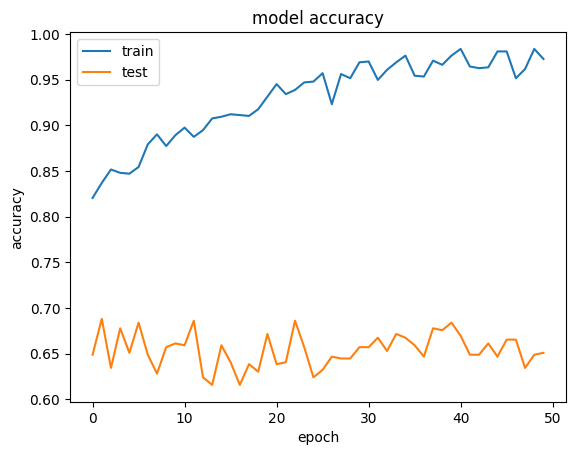

In [ ]:
plt.plot(classifier.history['accuracy'])
plt.plot(classifier.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

9. GRAFIK MODEL LOSS

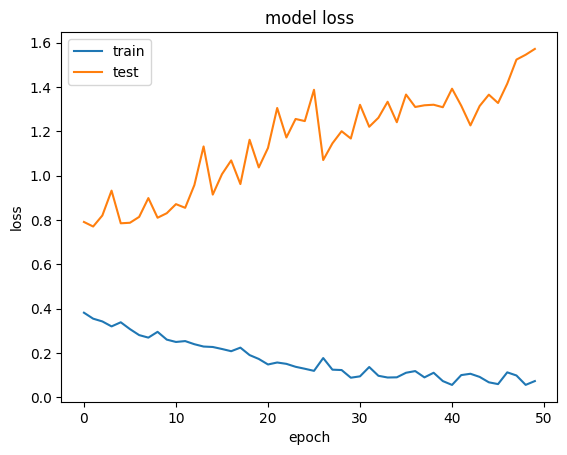

In [ ]:
plt.plot(classifier.history['loss'])
plt.plot(classifier.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

10. FUNGSI KLASIFIKASI GAMBAR

In [ ]:
training_set.class_indices

def predict(image):
    result = model.predict(image/255.0)
    if result[0][0] < 0.5:
      return "Gambar diklasifikasikan sebagai jamur yang beracun"
    else:
      return "Gambar diklasifikasikan sebagai jamur yang bisa dimakan"

11. KLASIFIKASI GAMBAR

1/1 [==============================] - 0s 35ms/step


'Gambar diklasifikasikan sebagai jamur yang beracun'

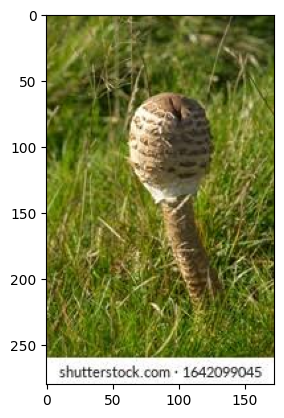

In [ ]:
img_loc = '/content/drive/MyDrive/Jamur/klasifikasi jamur/test/testing_poisonous/cv (100).jpg'
predict_image = image.load_img(img_loc, target_size= (64, 64))
predict_image = image.img_to_array(predict_image)
predict_image = np.expand_dims(predict_image, axis=0)

pred_img = implt.imread(img_loc)
plt.imshow(pred_img)

predict(predict_image)

1/1 [==============================] - 0s 22ms/step


'Gambar diklasifikasikan sebagai jamur yang bisa dimakan'

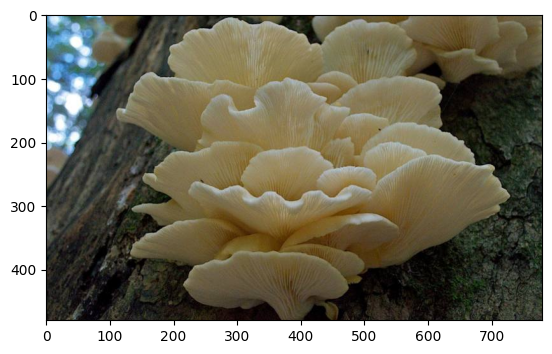

In [ ]:
img_loc = '/content/drive/MyDrive/Jamur/tes/2.-Jamur-Tiram.jpg'
predict_image = image.load_img(img_loc, target_size= (64, 64))
predict_image = image.img_to_array(predict_image)
predict_image = np.expand_dims(predict_image, axis=0)

pred_img = implt.imread(img_loc)
plt.imshow(pred_img)

predict(predict_image)